In [6]:
from google.colab import files
uploaded = files.upload()

Saving Financials.csv to Financials.csv


In [7]:
df = pd.read_csv('Financials.csv')
df.head()



,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1,618.00",3.0,20.0,"32,370.00",-,"32,370.00","16,185.00","16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.0,20.0,"26,420.00",-,"26,420.00","13,210.00","13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.0,15.0,"32,670.00",-,"32,670.00","21,780.00","10,890.00",1/6/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.0,15.0,"13,320.00",-,"13,320.00","8,880.00","4,440.00",1/6/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.0,15.0,"37,050.00",-,"37,050.00","24,700.00","12,350.00",1/6/2014,6,June,2014


In [8]:
import pandas as pd


In [9]:
# Replace spaces with underscores and make column names lowercase
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.head()


,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,"1,618.00",3.0,20.0,"32,370.00",-,"32,370.00","16,185.00","16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.0,20.0,"26,420.00",-,"26,420.00","13,210.00","13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.0,15.0,"32,670.00",-,"32,670.00","21,780.00","10,890.00",1/6/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.0,15.0,"13,320.00",-,"13,320.00","8,880.00","4,440.00",1/6/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.0,15.0,"37,050.00",-,"37,050.00","24,700.00","12,350.00",1/6/2014,6,June,2014


In [10]:
import sqlite3

# Create SQLite connection
conn = sqlite3.connect("sales_data.db")

# Store DataFrame into SQLite
df.to_sql('sales', conn, if_exists='replace', index=False)


700

In [11]:
query = """
SELECT
    product,
    SUM(units_sold) AS total_units_sold,
    SUM(sales) AS total_sales,
    SUM(profit) AS total_profit
FROM sales
GROUP BY product
"""

summary_df = pd.read_sql_query(query, conn)
print("Sales Summary by Product:")
print(summary_df)


Sales Summary by Product:
       product  total_units_sold  total_sales  total_profit
0    Amarilla            14532.0       1377.0       1304.00
1   Carretera            18052.5       1461.0       3480.41
2     Montana            14205.5       1563.0       3813.10
3       Paseo            29846.0       3456.0       7669.25
4         VTT            20940.0       2028.0       4524.66
5        Velo            25867.0       1856.0       3802.88


<Figure size 1000x600 with 0 Axes>

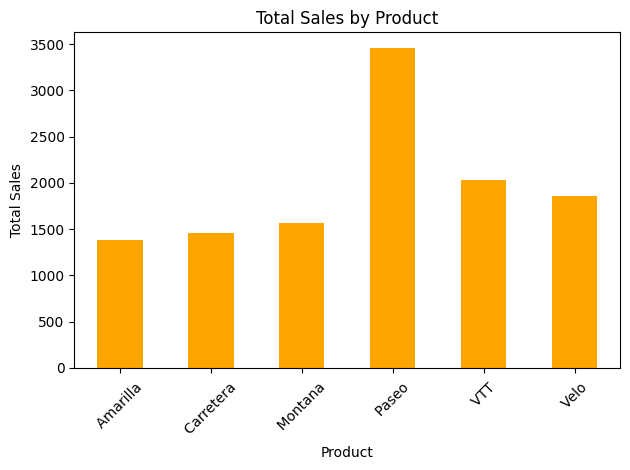

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
summary_df.plot(kind='bar', x='product', y='total_sales', legend=False, color='orange')
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
conn.close()
